In [101]:
import tensorflow as tf

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
class LinearRegression(tf.keras.Model):
    def __init__(self, num_inputs, num_outputs):
        super(LinearRegression, self).__init__()
        self.W = tf.Variable(
            tf.random_normal_initializer()((num_inputs, num_outputs)))
        self.b = tf.Variable(tf.zeros(num_outputs))
        self.params = [self.W, self.b]

    def call(self, inputs):
        return tf.matmul(inputs, self.W) + self.b
    

In [104]:
#Create a dataset
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1)*0.1
     

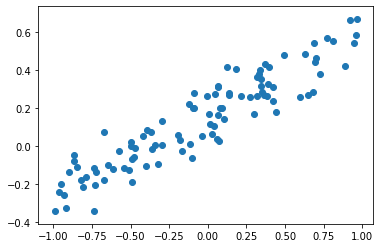

In [105]:
plt.scatter(X, Y)
plt.show()

In [106]:
#Cast type, otherwise Tensorflow will complain

X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [107]:
def get_loss(model, inputs, targets):
    predictions = model(inputs)
    error = targets - predictions
    return tf.reduce_mean(tf.square(error))

In [108]:
def get_grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = get_loss(model, inputs, targets)
        
    return tape.gradient(loss_value, model.params)

In [109]:
model = LinearRegression(D, K)

print("Initial Params: ")
print(model.W)
print(model.b)

Initial Params: 
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.04719998]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [110]:
losses = []

optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

for i in range(100):
    grads = get_grad(model, X, Y)
    optimizer.apply_gradients(zip(grads, model.params))
    
    
    loss = get_loss(model, X, Y)
    losses.append(loss)

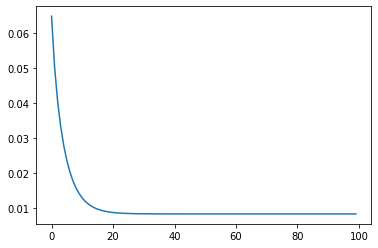

In [111]:
plt.plot(losses)

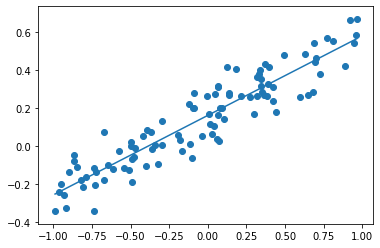

In [112]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1, 1)).flatten()

plt.scatter(X, Y)
plt.plot(x_axis, y_axis)

In [113]:
print("Predicted params:")
print(model.W)
print(model.b)

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.41836408]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.16276166], dtype=float32)>


In [114]:
print("True params:")
w, b

True params:


(array([[0.41342297]]), 0.15866473275750057)